In [1]:
# standard packages used to handle files
import sys
import os 
import glob
import time

# commonly used library for data manipulation
import pandas as pd

# numerical
import numpy as np

# handle images - opencv
import cv2

# machine learning library
import sklearn
import sklearn.preprocessing

# used to serialize python objects to disk and load them back to memory
import pickle

# plotting
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import time
import csv
import tqdm
import sys
import cv2
import collections
import numpy as np

ImageFeatures = collections.namedtuple(
    'ImageFeatures', 
    [
        'path',  # path to the image from which the descriptors were extracted
        'label',  # Image label as a string
        'data',  # Numpy array containing image features
    ]
)

# tell matplotlib that we plot in a notebook
%matplotlib notebook


In [2]:
# filepath constants, set these according to your workflow:

# where are your datasets:
dataset_path = "./images/"
# where do you want to save your features and other outputs:
output_path = './output/'

In [3]:
# you don't have to change the paths here:

dataset_path_train = os.path.join(dataset_path, 'train')
dataset_path_test = os.path.join(dataset_path, 'test')

features_path = os.path.join(output_path, 'features')
features_path_train = os.path.join(features_path, 'train')
features_path_test = os.path.join(features_path, 'test')

prediction_path = os.path.join(output_path, 'predictions')
# filepatterns to write out features
filepattern_descriptor_train = os.path.join(features_path_train, 'train_features_{}.pkl')
filepattern_descriptor_test = os.path.join(features_path_test, 'test_features_{}.pkl')
def createPath(path):
    """Creates a directory if it does not exist"""
    try:
        os.stat(path)
    except:
        os.mkdir(path)

createPath(features_path)
createPath(features_path_train)
createPath(features_path_test)
createPath(prediction_path)

def getImgPaths(data_folder):
    """Returns filepaths of all files contained in the given folder as strings."""
    return np.sort(glob.glob(os.path.join(data_folder, '*')))

In [4]:
folder_paths = glob.glob(os.path.join(dataset_path_train,'*'))
label_strings = np.sort(np.array([os.path.basename(path) for path in folder_paths]))
num_classes = label_strings.shape[0]

print("Amount of classes: ", num_classes)
print("\nLabels: \n", label_strings)

Amount of classes:  12

Labels: 
 ['chicken' 'elephant' 'fox' 'german_shepherd' 'golden_retriever' 'horse'
 'jaguar' 'lion' 'owl' 'parrot' 'swan' 'tiger']


In [5]:
train_paths = dict((label_string, getImgPaths(os.path.join(dataset_path_train, label_string))) 
                   for label_string in label_strings)

test_paths = getImgPaths(dataset_path_test)

In [6]:
descriptor_desired = 'daisy'

In [7]:
with open(filepattern_descriptor_train.format(descriptor_desired), 'rb') as pkl_file_train:
    train_features_from_pkl = pickle.load(pkl_file_train)
    
print('Number of encoded train images: {}'.format(len(train_features_from_pkl)))

Number of encoded train images: 4042


In [8]:
with open(filepattern_descriptor_test.format(descriptor_desired), 'rb') as pkl_file_test:
    test_features_from_pkl = pickle.load(pkl_file_test)
        
print('Number of encoded test images: {}'.format(len(test_features_from_pkl)))

Number of encoded test images: 4035


In [9]:
distortions = []

K = range (500,2000,50)

for k in K:
    
    train_features_to_encode = []
    
    for image_features in train_features_from_pkl:
        train_features_to_encode.append(image_features.data)

    train_features_to_encode = np.concatenate(train_features_to_encode, axis=0)

    km = MiniBatchKMeans(n_clusters=k, batch_size=k * 10)
    start = time.time()
    km.fit(train_features_to_encode)
    end = time.time()
    print('Codebook Size :',k,': training took {} seconds'.format(end-start),"")

    distortions.append(km.inertia_)

Codebook Size : 500 : training took 50.5142548084259 seconds 
Codebook Size : 550 : training took 51.44236707687378 seconds 
Codebook Size : 600 : training took 58.33954691886902 seconds 
Codebook Size : 650 : training took 65.87615585327148 seconds 
Codebook Size : 700 : training took 74.01735663414001 seconds 
Codebook Size : 750 : training took 79.94335079193115 seconds 
Codebook Size : 800 : training took 92.4803318977356 seconds 
Codebook Size : 850 : training took 104.20276093482971 seconds 
Codebook Size : 900 : training took 122.11711001396179 seconds 
Codebook Size : 950 : training took 134.76187419891357 seconds 
Codebook Size : 1000 : training took 121.66444420814514 seconds 
Codebook Size : 1050 : training took 125.39108085632324 seconds 
Codebook Size : 1100 : training took 145.11496901512146 seconds 
Codebook Size : 1150 : training took 153.17068719863892 seconds 
Codebook Size : 1200 : training took 165.26807713508606 seconds 
Codebook Size : 1250 : training took 183.686

<IPython.core.display.Javascript object>


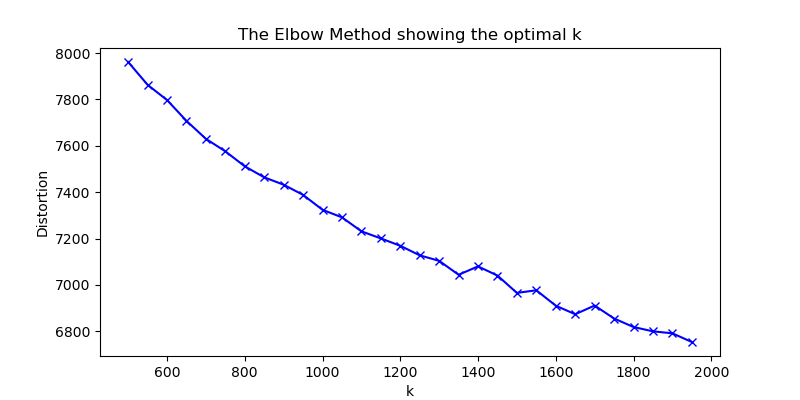

In [10]:
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()